In [1]:
import os
os.chdir('/mnt/jw01-aruk-home01/projects/ra_challenge/RA_challenge/RA2_alpine_lads/ra_joint_predictions')

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras 
import os
import tensorflow as tf
import tensorflow_addons as tfa
from utils.config import Config

import PIL
import PIL.ImageOps
from tensorflow.keras.utils import plot_model
configuration = Config()
from tensorflow.keras.models import load_model

import itertools
import seaborn as sns

AUTOTUNE = tf.data.experimental.AUTOTUNE

from dataset.ops import dataset_ops
import dataset.ops.image_ops as ops
from model.joint_damage_model import load_joint_damage_model
from train.train_joints_damage import _get_dataset

In [9]:
feet_narrowing_model = load_joint_damage_model("/mnt/jw01-aruk-home01/projects/ra_challenge/RA_challenge/michael_dev/RA2_alpine_lads/trained_models/adam_no_weights_reg/feet_narrowing_adam_no_weights_reg.h5", 5, True)

In [17]:
a,b, F_J_dataset, c = _get_dataset(configuration, "F", "J", True, True)

2020-03-14 18:48:12,359;INFO - Outcome 0, found outliers weights [60.4]
2020-03-14 18:48:12,361;INFO - Outcome 0, Updated outlier weights: [6.92682322]
2020-03-14 18:48:12,652;WARNING - Missing permissions to create directory for caching!
2020-03-14 18:48:12,654;WARNING - Missing permissions to create directory for caching!


/mnt/jw01-aruk-home01/projects/ra_challenge/tensorflow2.0_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':
/mnt/jw01-aruk-home01/projects/ra_challenge/tensorflow2.0_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


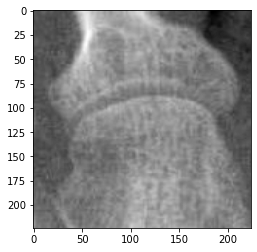

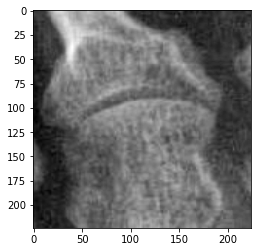

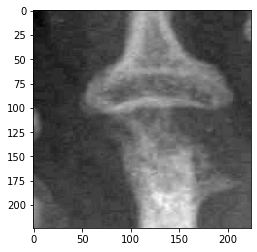

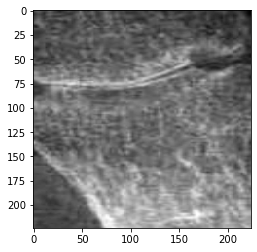

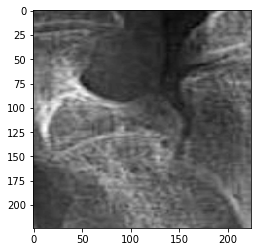

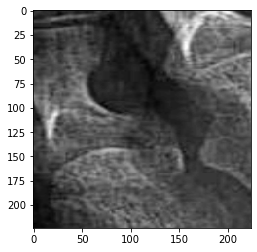

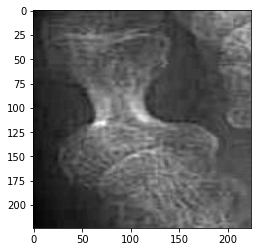

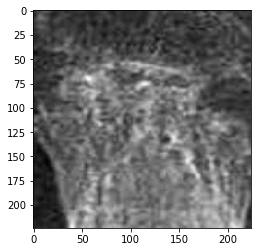

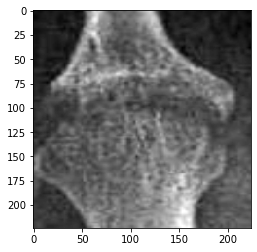

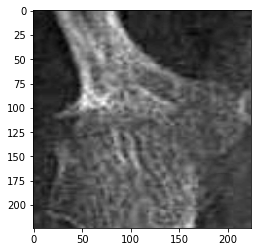

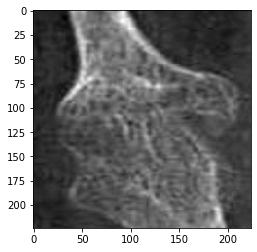

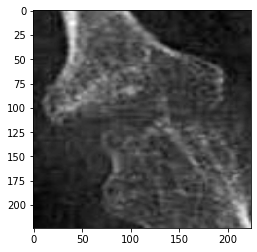

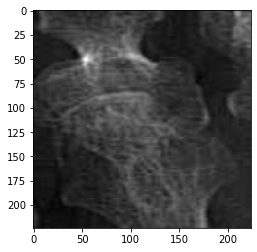

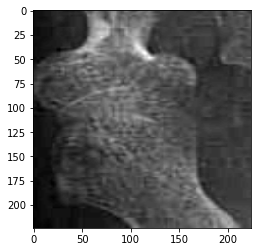

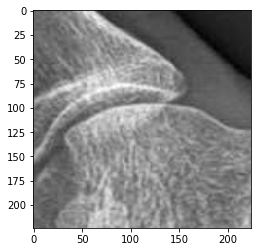

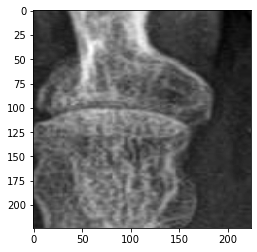

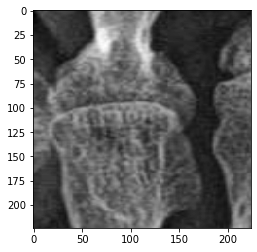

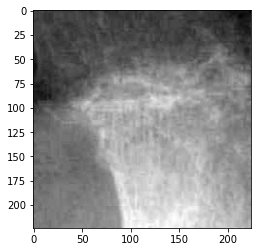

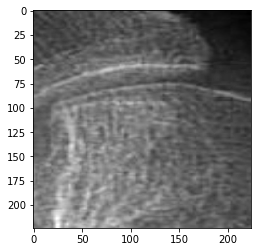

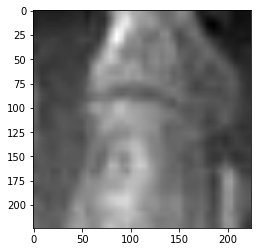

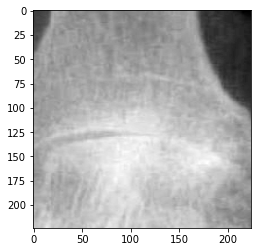

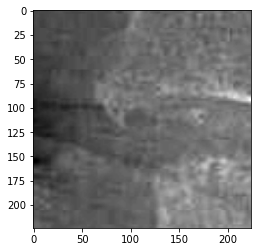

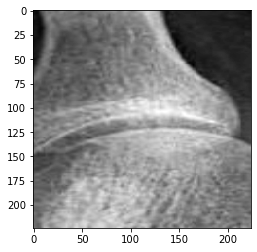

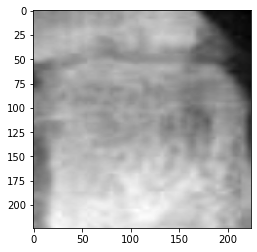

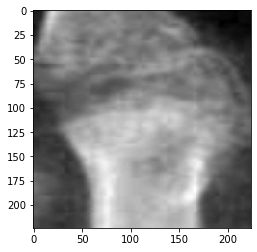

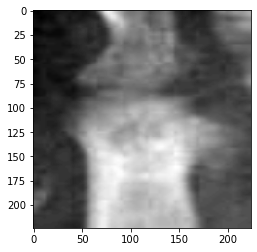

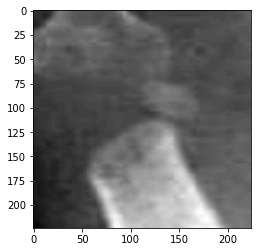

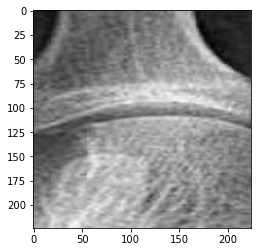

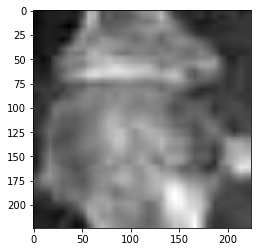

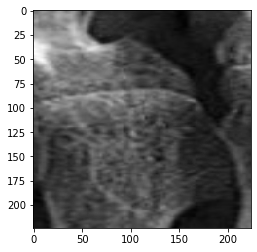

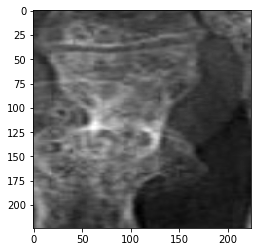

In [43]:
for imgs, labels in F_J_dataset.take(30):
    for img, label in zip(imgs,labels):
        pic = np.array(img).reshape((1,224,224,1))
        lab = np.array(label)[0]
        prediction = feet_narrowing_model.predict(np.array(img).reshape((1,224,224,1)))[0][0]
        if (lab == 3 or lab == 4) and prediction < 1.5:
            fig, ax = plt.subplots()
            plt.imshow(pic.reshape(224,224),cmap="gray")
            fig.show()


/mnt/jw01-aruk-home01/projects/ra_challenge/tensorflow2.0_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':
/mnt/jw01-aruk-home01/projects/ra_challenge/tensorflow2.0_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


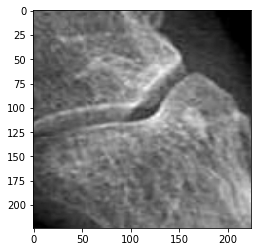

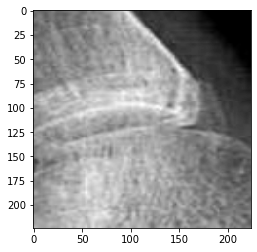

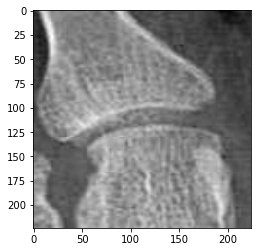

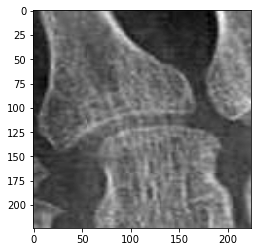

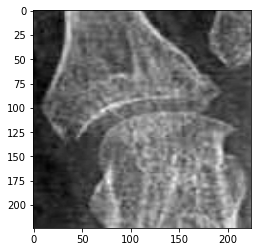

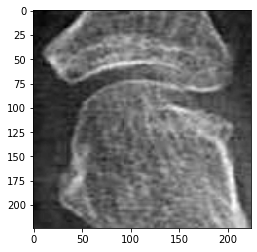

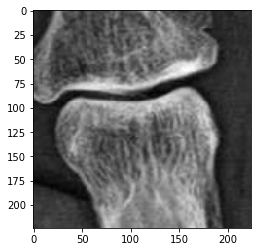

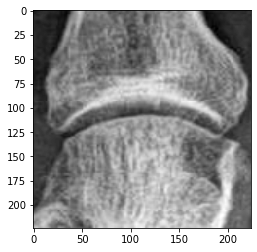

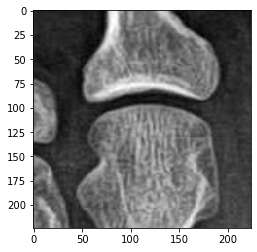

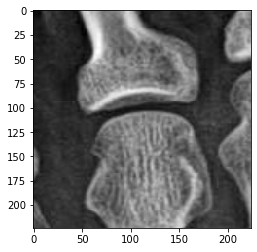

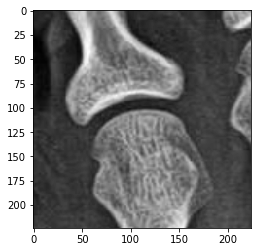

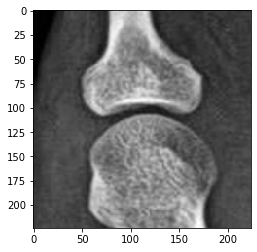

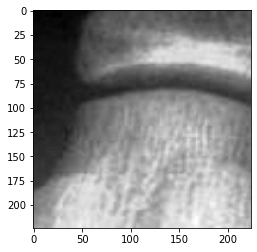

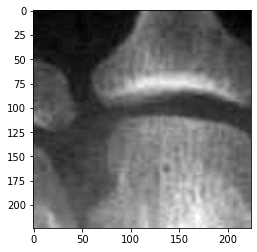

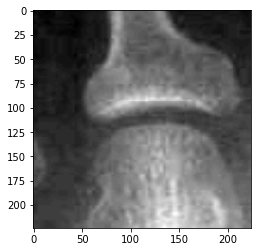

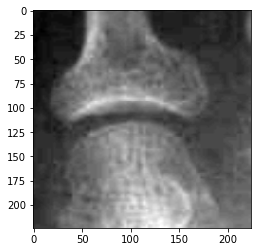

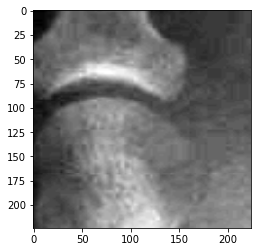

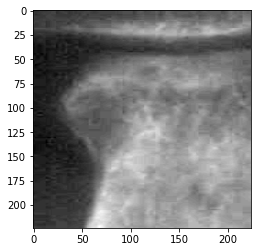

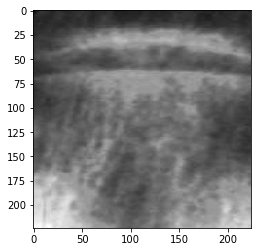

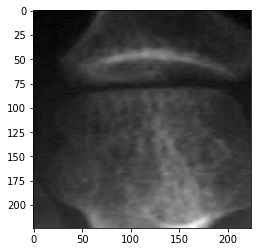

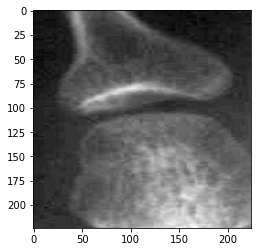

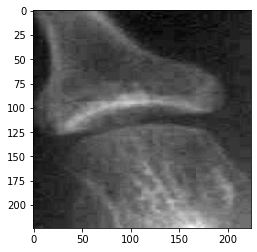

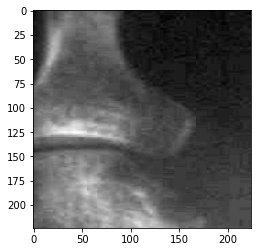

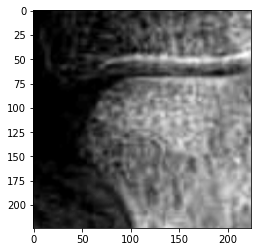

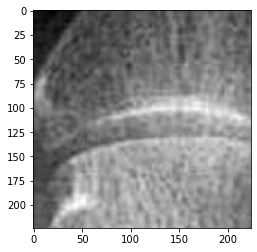

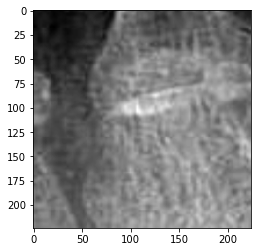

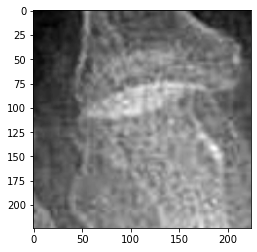

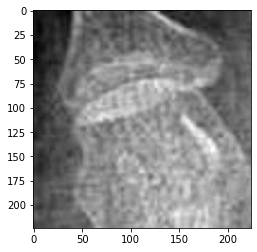

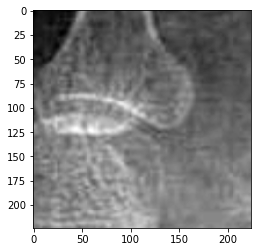

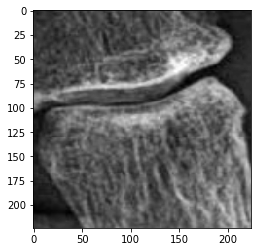

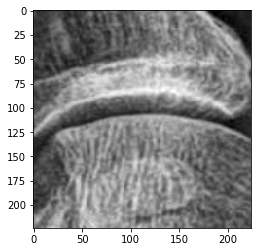

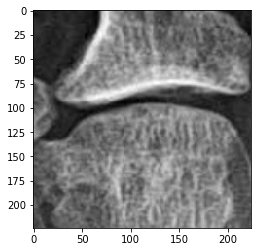

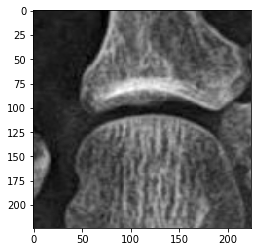

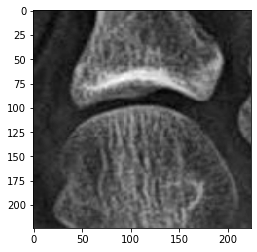

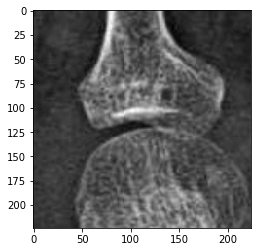

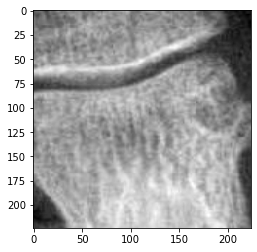

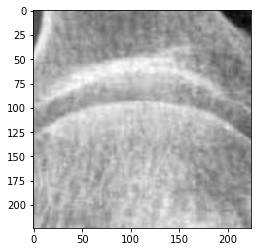

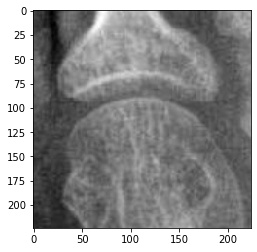

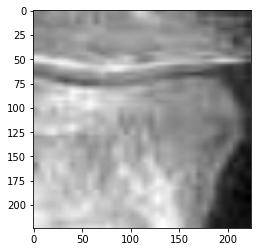

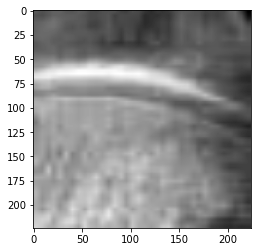

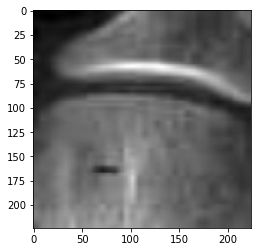

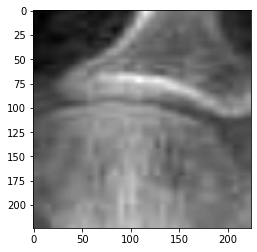

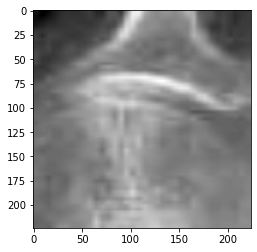

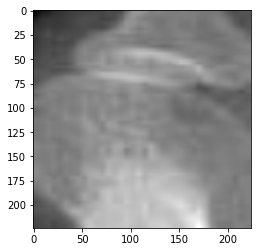

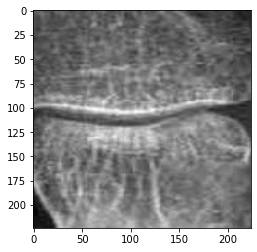

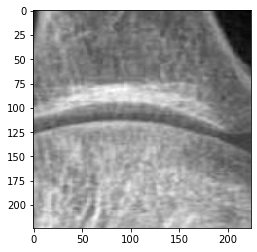

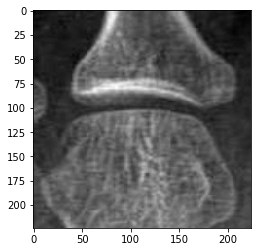

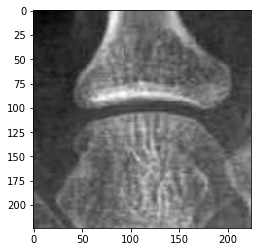

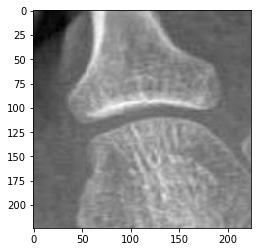

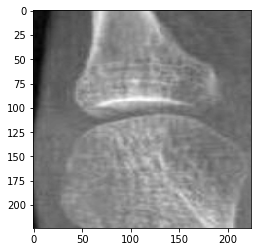

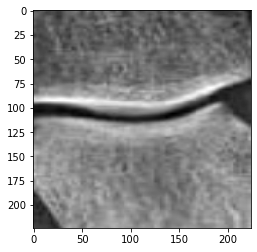

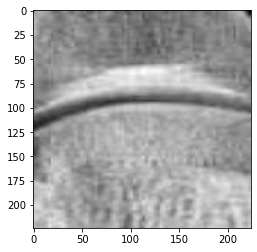

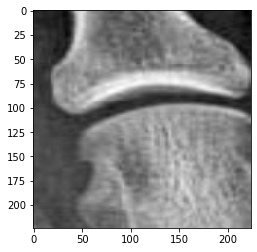

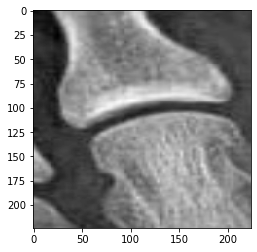

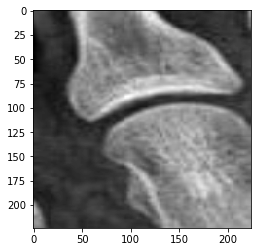

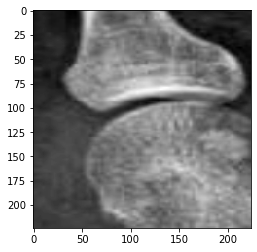

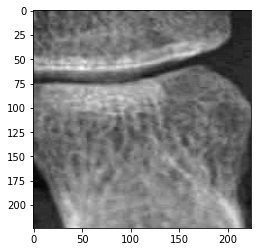

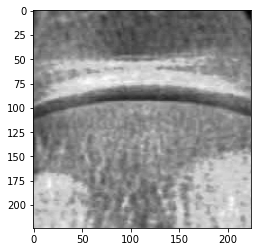

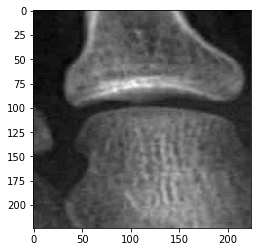

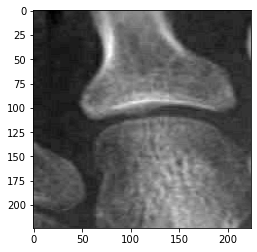

In [36]:
for imgs, labels in F_J_dataset.take(1):
    for img, label in zip(imgs,labels):
        pic = np.array(img).reshape((1,224,224,1))
        lab = np.array(label)[0]
        prediction = feet_narrowing_model.predict(np.array(img).reshape((1,224,224,1)))[0][0]
        if lab == 0 and prediction < 1:
            fig, ax = plt.subplots()
            plt.imshow(pic.reshape(224,224),cmap="gray")
            fig.show()